## Refactor `10Goal.py`

The code in question is structured to perform a detailed analysis of football match data, specifically focusing on the distribution of goals scored per match within a dataset from the German league. The ultimate goal is to visualize how often a certain number of goals is scored across all matches in the dataset and to compare this empirical distribution to a theoretical Poisson distribution, which is commonly used in statistics to model the probability of a given number of events happening in a fixed interval of time. Here's a breakdown of the logic behind the code and the significance of the "proportion of matches" and "number of goals scored":

### Data Preparation and Goal Identification
The initial steps involve loading match event data from a JSON file and creating a pandas DataFrame. 

In [13]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import matplotlib

with open('wyscout/events/events_Germany.json') as f:
    data = json.load(f)

data_df = pd.DataFrame(data)

### Identifying Shots and Goals

The code then filters this DataFrame to only include events categorized as "Shot", "Free kick shot", or "Penalty", which are the events that can potentially lead to goals. For each of these shot events, the code checks if any of the associated tags indicate that the shot resulted in a goal (tag id `101`). If a goal is found, the respective row is updated with the column Goal assigned to 1.


In [14]:
# Filter events to include only shots, free kick shots, and penalties.
shots = data_df[data_df['subEventName'].isin(['Shot', 'Free kick shot', 'Penalty'])]

# Initialize a 'Goal' column to 0 for all shots, indicating no goal by default.
shots = shots.assign(Goal=0)

# Iterate through each shot to check if it resulted in a goal, identified by tag id 101.
for i, shot in shots.iterrows():
    for tag in shot['tags']:
        if tag['id'] == 101:
            shots.at[i, 'Goal'] = 1


### Analysis of Shots and Goals per Match

After identifying goals, the code computes the total number of goals scored in each match. This is done by iterating over the unique match identifiers in the dataset, counting the number of goals for each match, and then storing these counts. This process results in two lists: `shots_in_match` and `goals_in_match`, although the former isn't directly used in the subsequent analysis.

In [15]:
# Extract unique match IDs to analyze data on a per-match basis.
match_list = shots['matchId'].unique().tolist()
num_matches = len(match_list)

# Initialize lists to store the count of shots and goals per match.
shots_in_match = []
goals_in_match = []

# Count the number of shots and goals for each match.
for match in match_list:
    shots_in_match.append(len(shots[shots['matchId'] == match]))
    goals_in_match.append(len(shots[np.logical_and(shots['matchId'] == match, shots['Goal'] == 1)]))


### Histogram and Poisson Distribution Comparison

This segment computes the mean goals per match and uses it to create a histogram and a Poisson distribution for comparison.

With the number of goals per match calculated, the code proceeds to analyze the distribution of these counts across the dataset. The distribution is visualized using a histogram, which plots the number of matches (y-axis) against the number of goals scored (x-axis). 

However, instead of showing the raw count of matches for each goal tally, the code calculates the proportion of matches for each goal count by dividing the number of matches with a certain goal count by the total number of matches. This normalization allows for a clearer comparison across datasets of different sizes and is particularly useful in understanding the likelihood of observing matches with specific goal counts.

In [36]:
# Make histogram of goals per match and calculate mean goals per match.
mean_goals = np.mean(goals_in_match) # lambda
goals_dist, goals_bins = np.histogram(goals_in_match, bins=np.arange(-0.5, 10.5))
goals_dist = goals_dist / num_matches

# Calculate a Poisson distribution based on the mean goals per match.
Poisson_g = np.zeros(10)
for i, k in enumerate(g):
    Poisson_g[i] = np.power(mean_goals, k) * np.exp(-mean_goals) / math.factorial(k)


$P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!}$

The Poisson distribution is a mathematical concept used to model the probability of a number of events occurring in a fixed period of time or space if these events happen with a known constant mean rate and independently of the time since the last event. The code calculates the mean number of goals per match across all matches and uses this mean to generate a theoretical Poisson distribution. This distribution is then plotted alongside the actual distribution of goals per match to compare the empirical data with the theoretical model. The comparison is insightful because the Poisson distribution is often a good approximation for the distribution of goals in football matches, reflecting the random nature of goal-scoring events.

### Plotting and Saving the Results

The histogram ("Actual Distribution") and the Poisson distribution curve ("Poisson Distribution") are plotted. The x-axis represents the number of goals scored, and the y-axis represents the proportion of matches with that number of goals, allowing for an intuitive understanding of how common certain goal tallies are within the dataset. The plot provides a visual representation of the goal-scoring dynamics across the dataset, offering insights into the variability and predictability of football matches.

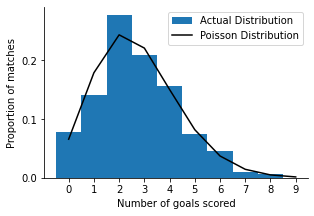

In [37]:
#Set up figure
fig=plt.figure()
from pylab import rcParams
rcParams['figure.figsize'] = 12/2.54, 8/2.54
ax=fig.add_subplot(1,1,1)


# Plot the histogram of goals per match with label for the legend.
plt.hist(g-0.5, bins=9, weights=goals_dist, label='Actual Distribution')

# Plot the Poisson distribution curve with a label for the legend.
plt.plot(g, Poisson_g, color='black', label='Poisson Distribution')

# Configure the plot appearance.
ax.set_yticks(np.arange(0, 0.3, 0.1)) 
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0, 10, 1))
ax.set_ylabel('Proportion of matches')
ax.set_xlabel('Number of goals scored')

# Add a legend to the plot to distinguish between actual and Poisson distribution.
plt.legend()

# Display the plot.
plt.show()

# Save the figure to a PDF file.
fig.savefig('output/PoissonDistributionGoals.pdf', dpi=None, bbox_inches="tight")


## Excercise: 

### 1. Making a Histogram of Shots per Game
First, you aggregate the shots by each game and then plot a histogram to visualize the distribution of shots per game.

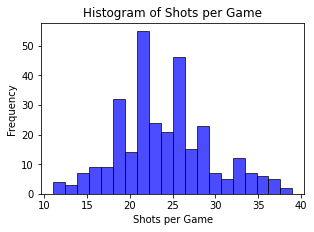

In [38]:
shots_in_match = shots.groupby('matchId').size()

# Plot the histogram
plt.hist(shots_in_match, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Shots per Game')
plt.ylabel('Frequency')
plt.title('Histogram of Shots per Game')
plt.show()

### 2. Finding the Mean and Standard Deviation for Shots per Game
Since `shots_in_match` is a list, we can easily compute the mean and standard deviation using numpy.

In [39]:
# Calculate mean and standard deviation from the list
mean_shots = np.mean(shots_in_match)
std_shots = np.std(shots_in_match)

print(f"Mean shots per game: {mean_shots:.2f}")
print(f"Standard deviation of shots per game: {std_shots:.2f}")

Mean shots per game: 23.82
Standard deviation of shots per game: 5.41


### 3. Showing that Shots per Game is Roughly Normally Distributed
To overlay a normal distribution curve on the histogram of shots per game, we use the mean and standard deviation computed from the `shots_in_match` list.

Mean shots per game: 23.82
Standard deviation of shots per game: 5.42


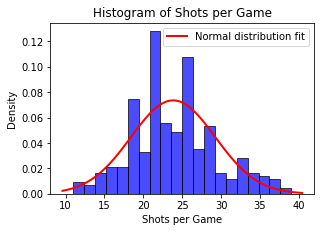

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming 'shots_in_match' is a list with the number of shots in each game
# Plot the histogram of shots per game
plt.hist(shots_in_match, bins=20, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.xlabel('Shots per Game')
plt.ylabel('Density')
plt.title('Histogram of Shots per Game')

# Calculate mean and standard deviation from the list
mean_shots = np.mean(shots_in_match)
std_shots = np.std(shots_in_match, ddof=1)  # Use ddof=1 for sample standard deviation

print(f"Mean shots per game: {mean_shots:.2f}")
print(f"Standard deviation of shots per game: {std_shots:.2f}")

# Generate values for the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_shots, std_shots)

# Overlay the normal distribution curve
plt.plot(x, p, linewidth=2, color='red', label='Normal distribution fit')

# Add legend
plt.legend()

# Show plot
plt.show()
